# COLLEGE AND UNIVERSITIES

## Load Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation 

from sklearn.model_selection import train_test_split

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

## Data collection

In [2]:
df = pd.read_csv('Colleges_and_Universities.csv')

# drop unnecessary columns
df.drop(['X', 'Y', 'ADDRESS2', 'ZIP4', 'SOURCE_DAT', 'VAL_METHOD', 'VAL_DATE','HI_OFFER', 'DEG_GRANT', 'LOCALE', 'CLOSE_DATE', 'MERGE_ID', 'ALIAS', 'SIZE_SET', 'HOUSING', 'DORM_CAP', 'SHELTER_ID', 'WEBSITE'], inplace=True, axis=1)

df.head()

,FID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,TELEPHONE,TYPE,STATUS,...,SOURCE,STFIPS,COFIPS,SECTOR,LEVEL_,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY
0,7001,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,(501) 374-6305 ext 107,2,R,...,http://nces.ed.gov/GLOBALLOCATOR/col_info_popu...,5,119,5,2,1,24,28,52,18
1,7002,112181,Citrus Heights Beauty College,7518 Baird Way,Citris Heights,CA,95610,(916) 725-6861 ext 1,3,R,...,http://nces.ed.gov/GLOBALLOCATOR/col_info_popu...,6,67,9,3,1,6,24,30,9
2,7003,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,Los Angeles,CA,90027,(323) 467-4949,3,R,...,http://nces.ed.gov/GLOBALLOCATOR/col_info_popu...,6,37,9,3,1,0,24,24,11
3,7004,125310,Waynes College of Beauty,1271 North Main Street,Salinas,CA,93906,(831) 443-4077,3,R,...,http://nces.ed.gov/GLOBALLOCATOR/col_info_popu...,6,53,9,3,1,18,16,34,9
4,7005,164368,Hult International Business School,1 Education Street,Cambridge,MA,02141,(617) 746-1990,2,R,...,http://nces.ed.gov/GLOBALLOCATOR/col_info_popu...,25,17,2,1,2,0,2243,2243,143


In [3]:
df.shape

(7735, 28)

## Data Cleanning

In [4]:
df.isnull().sum()

FID           0
IPEDSID       0
NAME          0
ADDRESS       0
CITY          0
STATE         0
ZIP           0
TELEPHONE     0
TYPE          0
STATUS        0
POPULATION    0
COUNTY        0
COUNTYFIPS    0
COUNTRY       0
LATITUDE      0
LONGITUDE     0
NAICS_CODE    0
NAICS_DESC    0
SOURCE        0
STFIPS        0
COFIPS        0
SECTOR        0
LEVEL_        0
INST_SIZE     0
PT_ENROLL     0
FT_ENROLL     0
TOT_ENROLL    0
TOT_EMPLOY    0
dtype: int64

In [5]:
df.isnull().sum() * 100 / len(df)

FID           0.0
IPEDSID       0.0
NAME          0.0
ADDRESS       0.0
CITY          0.0
STATE         0.0
ZIP           0.0
TELEPHONE     0.0
TYPE          0.0
STATUS        0.0
POPULATION    0.0
COUNTY        0.0
COUNTYFIPS    0.0
COUNTRY       0.0
LATITUDE      0.0
LONGITUDE     0.0
NAICS_CODE    0.0
NAICS_DESC    0.0
SOURCE        0.0
STFIPS        0.0
COFIPS        0.0
SECTOR        0.0
LEVEL_        0.0
INST_SIZE     0.0
PT_ENROLL     0.0
FT_ENROLL     0.0
TOT_ENROLL    0.0
TOT_EMPLOY    0.0
dtype: float64

In [6]:
df.dtypes

FID             int64
IPEDSID         int64
NAME           object
ADDRESS        object
CITY           object
STATE          object
ZIP            object
TELEPHONE      object
TYPE            int64
STATUS         object
POPULATION      int64
COUNTY         object
COUNTYFIPS      int64
COUNTRY        object
LATITUDE      float64
LONGITUDE     float64
NAICS_CODE      int64
NAICS_DESC     object
SOURCE         object
STFIPS          int64
COFIPS          int64
SECTOR          int64
LEVEL_          int64
INST_SIZE       int64
PT_ENROLL       int64
FT_ENROLL       int64
TOT_ENROLL      int64
TOT_EMPLOY      int64
dtype: object

In [7]:
df.describe()

,FID,IPEDSID,TYPE,POPULATION,COUNTYFIPS,LATITUDE,LONGITUDE,NAICS_CODE,STFIPS,COFIPS,SECTOR,LEVEL_,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY
count,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000
mean,3868.000000,281864.075889,2.201034,3233.846800,29196.812023,37.425260,-90.506517,611360.962379,29.152165,83.819134,4.774144,1.861926,1.577893,1032.233355,1727.344796,2759.578151,474.268649
std,2233.046499,131529.530737,0.842711,7826.541161,16713.057137,5.800367,17.595184,131.336865,16.704485,103.618466,3.064863,0.823791,1.077236,3006.886573,4790.666270,6695.364257,1488.795583
min,1.000000,100636.000000,-3.000000,0.000000,-999.000000,-14.323171,-170.743175,611210.000000,1.000000,-999.000000,0.000000,-3.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,1934.500000,170270.500000,1.000000,140.000000,13121.000000,33.990664,-97.362353,611210.000000,13.000000,29.000000,2.000000,1.000000,1.000000,0.000000,81.000000,114.000000,20.000000
50%,3868.000000,222886.000000,2.000000,514.000000,29147.000000,38.855847,-86.663047,611310.000000,29.000000,61.000000,4.000000,2.000000,1.000000,59.000000,318.000000,434.000000,74.000000
75%,5801.500000,440314.000000,3.000000,2657.500000,42029.000000,41.392206,-79.225690,611511.000000,42.000000,107.000000,7.000000,3.000000,2.000000,600.000000,1415.000000,2232.500000,383.000000
max,7735.000000,480569.000000,3.000000,227548.000000,78030.000000,71.324702,171.378442,611710.000000,78.000000,840.000000,99.000000,3.000000,5.000000,65310.000000,204920.000000,204920.000000,28018.000000


### Binning

In [8]:
bins = np.linspace(min(df['TOT_ENROLL']), max(df['TOT_ENROLL']), 4)
bins

array([     0.        ,  68306.66666667, 136613.33333333, 204920.        ])

In [9]:
group_names = ['Low', 'Medium', 'High']

In [10]:
df['BINNED_TOT_ENROLL'] = pd.cut(df['TOT_ENROLL'], bins, labels=group_names, include_lowest=True )
df[['TOT_ENROLL','BINNED_TOT_ENROLL']].head()

,TOT_ENROLL,BINNED_TOT_ENROLL
0,52,Low
1,30,Low
2,24,Low
3,34,Low
4,2243,Low


In [11]:
df['BINNED_TOT_ENROLL'].value_counts()

Low       7730
Medium       4
High         1
Name: BINNED_TOT_ENROLL, dtype: int64

In [12]:
df['BINNED_TOT_ENROLL'] = df['BINNED_TOT_ENROLL'].astype(str)

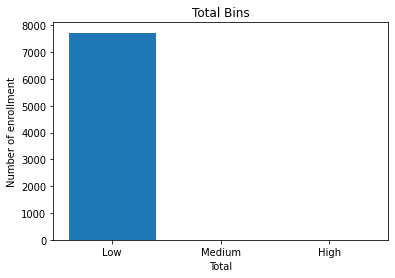

In [13]:
plt.bar(group_names, df['BINNED_TOT_ENROLL'].value_counts())

# set x/y labels and plot title 
plt.xlabel('Total')
plt.ylabel('Number of enrollment')
plt.title('Total Bins').figure.savefig('Binned_Enrollment.png')

## Data Transformation

### Clustering

In [14]:
x = df[['LONGITUDE', 'LATITUDE']]
ss = StandardScaler()
X = ss.fit_transform(x)

print(X) 

[[-0.09969125 -0.45964748]
 [-1.74962101  0.22208539]
 [-1.57897459 -0.57306609]
 ...
 [-1.5760918  -0.60854424]
 [ 0.35978031 -0.58317059]
 [ 0.41973224  0.44922468]]


In [15]:
model = KMeans(n_clusters = 3, verbose=0)   #build the model
model.fit(X)

KMeans(n_clusters=3)

In [16]:
kmeans_labels = pd.DataFrame(model.labels_)   # put into a DataFrame. We will use this shortly...
kmeans_labels

,0
0,2
1,1
2,1
3,1
4,0
...,...
7730,0
7731,0
7732,1
7733,2


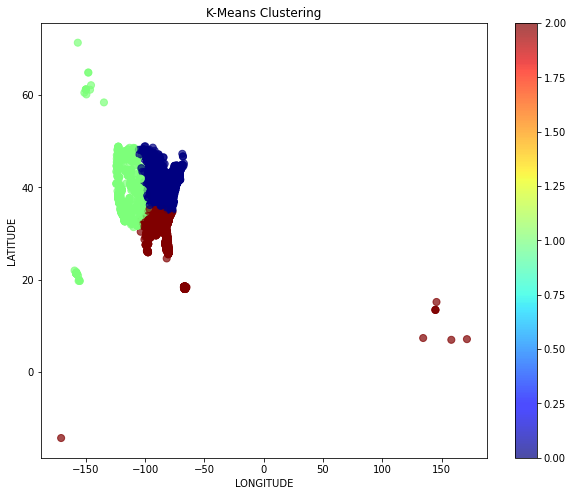

In [17]:
def plot_kmeans_scatter(v1, v2):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(v1, v2, c=kmeans_labels[0],s=50,cmap='jet',alpha=0.7)
    ax.set_title('K-Means Clustering')
    ax.set_xlabel(v1.name)
    ax.set_ylabel(v2.name)
    plt.colorbar(scatter)
    plt.show()
    ax.figure.savefig('K-Means.png')

v1 = df['LONGITUDE']
v2 = df['LATITUDE']
plot_kmeans_scatter(v1, v2)

## Exploratory Data Analysis

### 3.1 Descriptive Question

In [18]:
max_pt = df['PT_ENROLL'].max()
max_ft = df['FT_ENROLL'].max()
print('Max number of part-time enrollment:', max_pt)
print('Max number of full-time enrollment:', max_ft)

Max number of part-time enrollment: 65310
Max number of full-time enrollment: 204920


### 3.2 Exploratory Question

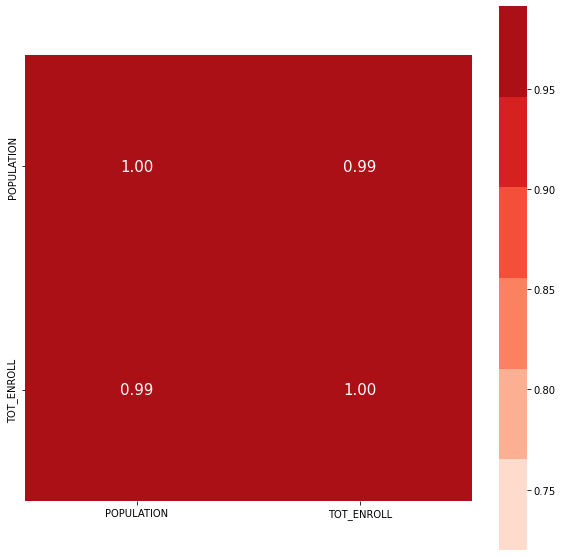

In [19]:
corr_list = list(['POPULATION', 'TOT_ENROLL'])
corr = df[corr_list].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds")).figure.savefig('Heatmap.png')

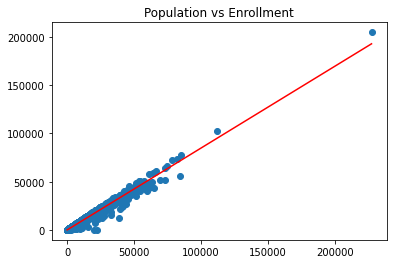

In [20]:
plt.scatter(df['POPULATION'],df['TOT_ENROLL'])
plt.plot(np.unique(df['POPULATION']), np.poly1d(np.polyfit(df['POPULATION'], df['TOT_ENROLL'], 1))
         (np.unique(df['POPULATION'])), color='red')
plt.title('Population vs Enrollment').figure.savefig('Population_vs_Enrollment_Regplot_All.png')

### 3.3 Inferential Question

In [21]:
df1 = df.copy()

In [22]:
filter = df1['STATE'] == 'CA'
df1 = df1[filter]
df1.head()

,FID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,TELEPHONE,TYPE,STATUS,...,STFIPS,COFIPS,SECTOR,LEVEL_,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,BINNED_TOT_ENROLL
1,7002,112181,Citrus Heights Beauty College,7518 Baird Way,Citris Heights,CA,95610,(916) 725-6861 ext 1,3,R,...,6,67,9,3,1,6,24,30,9,Low
2,7003,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,Los Angeles,CA,90027,(323) 467-4949,3,R,...,6,37,9,3,1,0,24,24,11,Low
3,7004,125310,Waynes College of Beauty,1271 North Main Street,Salinas,CA,93906,(831) 443-4077,3,R,...,6,53,9,3,1,18,16,34,9,Low
9,7010,395195,Colton-Redlands-Yucaipa Regional Occupational ...,1214 Indiana Ct,Redlands,CA,92374,(909) 793-3115,1,R,...,6,71,7,3,1,0,142,142,89,Low
14,7015,475097,International Culinary Center-California,700 West Hamilton Avenue,Campbell,CA,95008,(408) 370-9190,3,R,...,6,85,9,3,1,20,54,74,49,Low


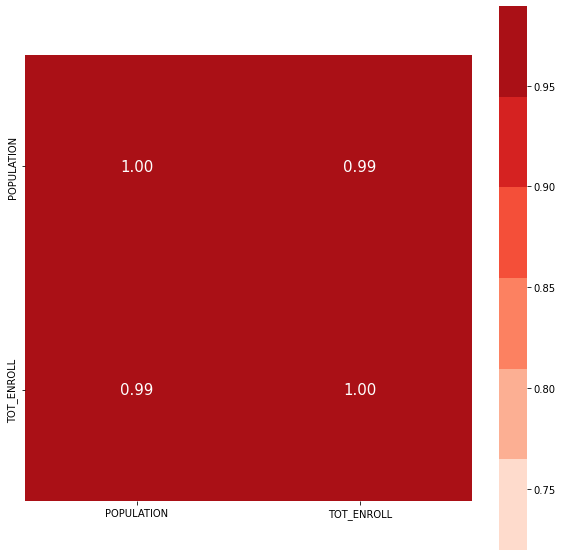

In [23]:
corr_list = list(['POPULATION', 'TOT_ENROLL'])
corr = df1[corr_list].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds")).figure.savefig('Heatmap1.png')

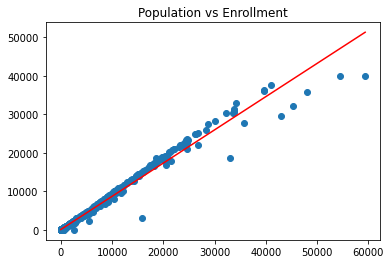

In [24]:
plt.scatter(df1['POPULATION'],df1['TOT_ENROLL'])
plt.plot(np.unique(df1['POPULATION']), np.poly1d(np.polyfit(df1['POPULATION'], df1['TOT_ENROLL'], 1))
         (np.unique(df1['POPULATION'])), color='red')
plt.title('Population vs Enrollment').figure.savefig('Population_vs_Enrollment_Regplot_CA.png')

### 3.4 Predictive Question

### Regression

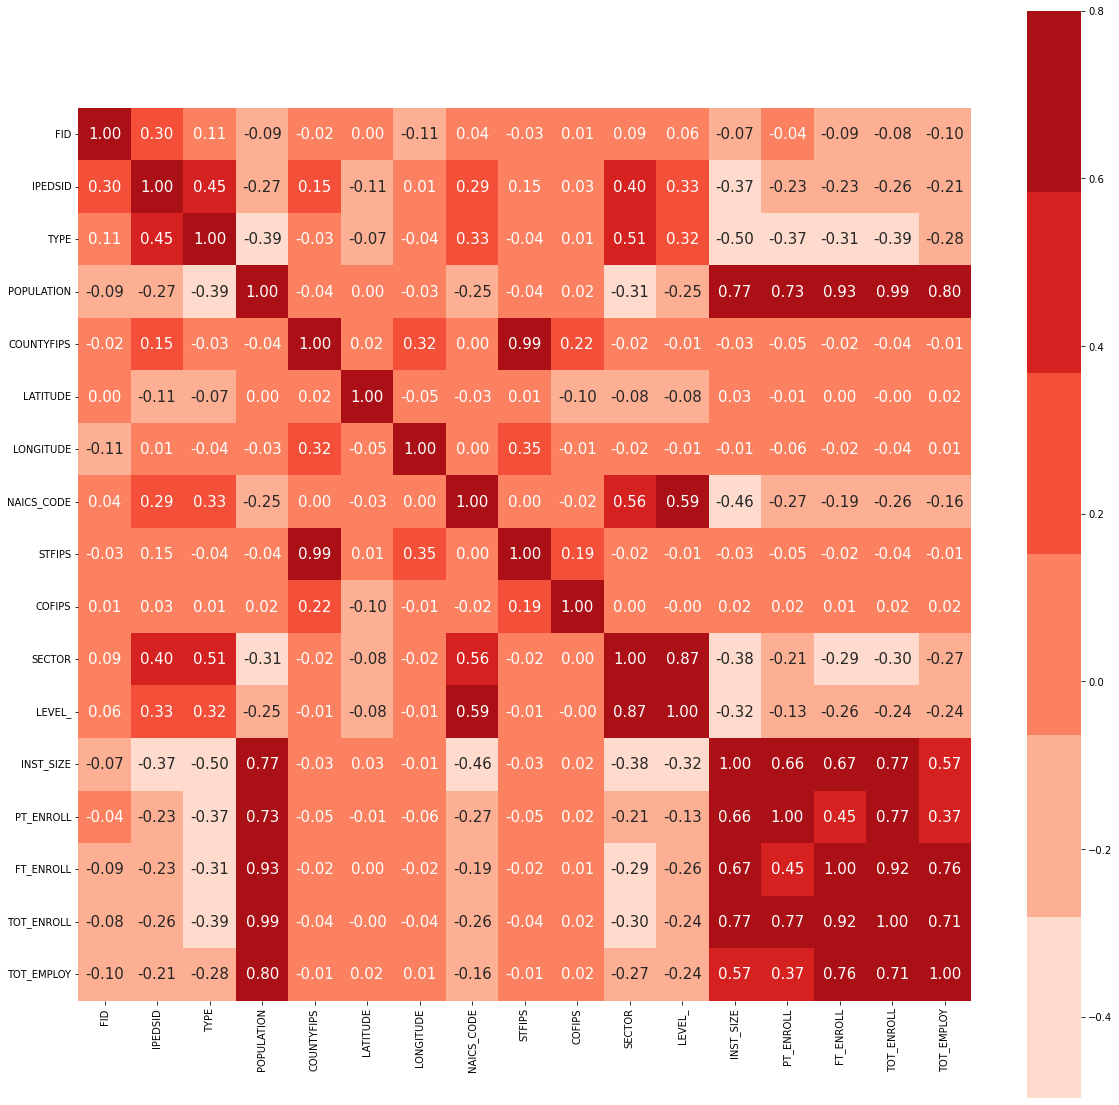

In [25]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds")).figure.savefig('Heatmap2.png')

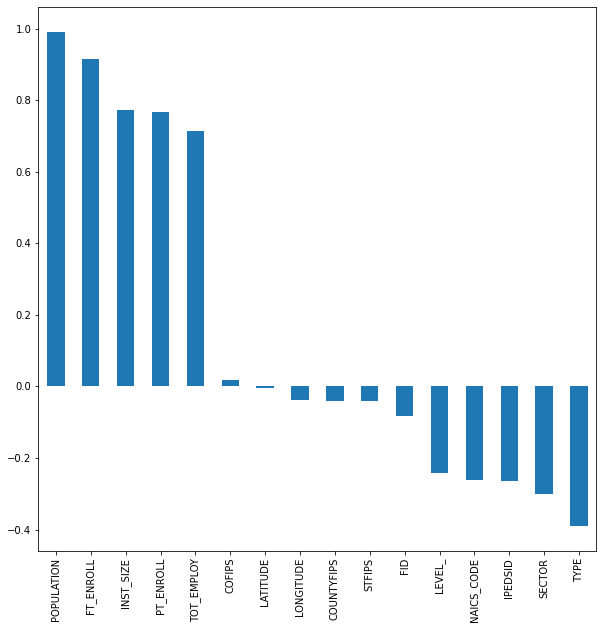

In [26]:
corr_with_enroll = df.corr()["TOT_ENROLL"].sort_values(ascending=False)
plt.figure(figsize=(10,10))
corr_with_enroll.drop("TOT_ENROLL").plot.bar().figure.savefig('Correlation_Bar.png')
plt.show()

In [27]:
df_new = df.copy()

In [28]:
filter = df_new['NAICS_DESC'] == 'Junior Colleges'
df_new = df_new[filter]
df_new

,FID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,TELEPHONE,TYPE,STATUS,...,STFIPS,COFIPS,SECTOR,LEVEL_,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,BINNED_TOT_ENROLL
0,7001,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,(501) 374-6305 ext 107,2,R,...,5,119,5,2,1,24,28,52,18,Low
16,7017,475352,Virginia College-Savannah,"14045 Abercorn Street, Suite 1503",Savannah,GA,31419,(912) 721-5600,3,N,...,13,51,6,2,1,177,586,763,139,Low
26,7027,475477,City College-Hollywood,6565 Taft Street,Hollywood,FL,33024,(954) 977-1777,2,N,...,12,11,5,2,1,18,47,65,17,Low
37,7038,475583,Bryan University,3215 LeMone Industrial Boulevard,Columbia,MO,65201,(573) 777-5550,3,N,...,29,19,6,2,1,0,121,121,33,Low
38,7039,475592,Virginia College-Tulsa,5124 South Peoria Avenue,Tulsa,OK,74105,(918) 960-5400,3,N,...,40,143,6,2,1,17,143,160,71,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7715,2981,443270,Southeastern College-Jacksonville,"6700 Southpoint Parkway, Suite 400",Jacksonville,FL,32216,(904) 448-9499,3,A,...,12,31,6,2,1,45,165,210,103,Low
7723,2989,443377,Triangle Tech Inc-Sunbury,191 Performance Road,Sunbury,PA,17801,(570) 988-0700,3,A,...,42,97,6,2,1,0,105,105,22,Low
7726,2992,443438,Medvance Institute-Fort Lauderdale,"4850 W. Oakland Park Blvd., Suite 200",Lauderdale Lakes,FL,33313,(954) 587-7100 ext 6524,3,A,...,12,11,6,2,1,0,331,331,34,Low
7731,2997,443492,Pierpont Community and Technical College,1201 Locust Ave,Fairmont,WV,26554,(304) 367-4692,1,A,...,54,49,4,2,2,772,2415,3187,283,Low


### Split train-test dataset

In [29]:
X = df[['POPULATION']]
Y = df[['TOT_ENROLL']]

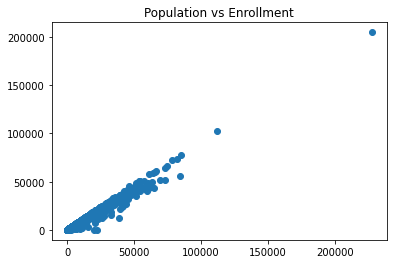

In [30]:
plt.plot(X,Y, linestyle='',marker='o')
plt.title('Population vs Enrollment').figure.savefig('Population_vs_Enrollment.png')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

### Create Linear Regression model

In [32]:
lm = LinearRegression()
lm.fit(X_train, y_train)
Y_test_pred = lm.predict(X_test)
Y_train_pred = lm.predict(X_train)

print('Train r2 score: ', r2_score(Y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, Y_test_pred)) 
print('Train MAE: ', mean_absolute_error(Y_train_pred, y_train))
print('Test MAE: ',mean_absolute_error(y_test, Y_test_pred))

Train r2 score:  0.9819861144001455
Test r2 score:  0.9816923218118879
Train MAE:  231.5494600903543
Test MAE:  229.86777539443798


### Create Decision Tree Regression model

In [33]:
dtr1 = DecisionTreeRegressor(max_depth=7)
dtr1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [34]:
y_pred2 = dtr1.predict(X_test)
dtr1_mae = mean_absolute_error(y_test, y_pred2)
dtr1_mae

263.48660348367974

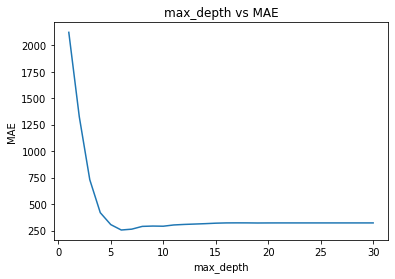

In [35]:
depth = 30
max_depth = [i for i in range(1,depth+1)] 
dtr_mae = [] 
for i in range(1,depth+1):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train, y_train)
    dtr_y_pred = dtr.predict(X_test)
    dtr_mae.append(mean_absolute_error(y_test, dtr_y_pred))
    
plt.plot(max_depth, dtr_mae)
plt.xlabel('max_depth')
plt.ylabel('MAE')
plt.title('max_depth vs MAE').figure.savefig('DTR.png')
plt.show()

### Data visualization for prediction of regression model

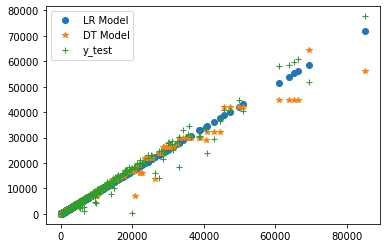

In [36]:
plt.plot(X_test,Y_test_pred, linestyle='',marker='o', label='LR Model')
plt.plot(X_test,y_pred2, linestyle='',marker='*', label='DT Model')
plt.plot(X_test,y_test, linestyle='',marker='+', label='y_test')
plt.ticklabel_format(style='plain')
plt.legend().figure.savefig('Predicted_Enrollment.png')

### Data Merging

Merge with estimated 2021 population in US dataset called "co-est2021-alldata.csv"

In [37]:
population = pd.read_csv('co-est2021-alldata.csv', encoding= 'unicode_escape')
population = population[['STATE', 'COUNTY', 'POPESTIMATE2021']]
population.rename(columns={"STATE": "STFIPS", "COUNTY": "COFIPS"}, inplace=True)
df_new = df_new.merge(population, how='left')
df_new.dropna(subset=['POPESTIMATE2021'], inplace=True)
df_new['POPESTIMATE2021'] = (df_new['POPESTIMATE2021'].to_numpy()[:, None] * 0.072)
df_new['POPESTIMATE2021'] = df_new['POPESTIMATE2021'].astype(int)
df_new

,FID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,TELEPHONE,TYPE,STATUS,...,COFIPS,SECTOR,LEVEL_,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,BINNED_TOT_ENROLL,POPESTIMATE2021
0,7001,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,(501) 374-6305 ext 107,2,R,...,119,5,2,1,24,28,52,18,Low,28643
1,7017,475352,Virginia College-Savannah,"14045 Abercorn Street, Suite 1503",Savannah,GA,31419,(912) 721-5600,3,N,...,51,6,2,1,177,586,763,139,Low,21335
2,7027,475477,City College-Hollywood,6565 Taft Street,Hollywood,FL,33024,(954) 977-1777,2,N,...,11,5,2,1,18,47,65,17,Low,139030
3,7038,475583,Bryan University,3215 LeMone Industrial Boulevard,Columbia,MO,65201,(573) 777-5550,3,N,...,19,6,2,1,0,121,121,33,Low,13380
4,7039,475592,Virginia College-Tulsa,5124 South Peoria Avenue,Tulsa,OK,74105,(918) 960-5400,3,N,...,143,6,2,1,17,143,160,71,Low,48445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,2981,443270,Southeastern College-Jacksonville,"6700 Southpoint Parkway, Suite 400",Jacksonville,FL,32216,(904) 448-9499,3,A,...,31,6,2,1,45,165,210,103,Low,71995
2023,2989,443377,Triangle Tech Inc-Sunbury,191 Performance Road,Sunbury,PA,17801,(570) 988-0700,3,A,...,97,6,2,1,0,105,105,22,Low,6571
2024,2992,443438,Medvance Institute-Fort Lauderdale,"4850 W. Oakland Park Blvd., Suite 200",Lauderdale Lakes,FL,33313,(954) 587-7100 ext 6524,3,A,...,11,6,2,1,0,331,331,34,Low,139030
2025,2997,443492,Pierpont Community and Technical College,1201 Locust Ave,Fairmont,WV,26554,(304) 367-4692,1,A,...,49,4,2,2,772,2415,3187,283,Low,4032


In [38]:
real_X = df_new[['POPESTIMATE2021']]

In [39]:
df_new.isnull().sum()

FID                  0
IPEDSID              0
NAME                 0
ADDRESS              0
CITY                 0
STATE                0
ZIP                  0
TELEPHONE            0
TYPE                 0
STATUS               0
POPULATION           0
COUNTY               0
COUNTYFIPS           0
COUNTRY              0
LATITUDE             0
LONGITUDE            0
NAICS_CODE           0
NAICS_DESC           0
SOURCE               0
STFIPS               0
COFIPS               0
SECTOR               0
LEVEL_               0
INST_SIZE            0
PT_ENROLL            0
FT_ENROLL            0
TOT_ENROLL           0
TOT_EMPLOY           0
BINNED_TOT_ENROLL    0
POPESTIMATE2021      0
dtype: int64

### Model prediction 

In [40]:
lm_y_pred = lm.predict(real_X)
drt_y_pred = dtr1.predict(real_X)
lm_y_pred = pd.DataFrame(lm_y_pred, columns=['LR'])
drt_y_pred = pd.DataFrame(drt_y_pred, columns=['DT'])

In [41]:
lm_y_pred = lm_y_pred.astype(int)
drt_y_pred = drt_y_pred.astype(int)

In [42]:
df_new1 = pd.concat([df_new.reset_index(drop=True), lm_y_pred, drt_y_pred], axis=1) 

df_new1

,FID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,TELEPHONE,TYPE,STATUS,...,LEVEL_,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,BINNED_TOT_ENROLL,POPESTIMATE2021,LR,DT
0,7001,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,(501) 374-6305 ext 107,2,R,...,2,1,24,28,52,18,Low,28643,24238,26222
1,7017,475352,Virginia College-Savannah,"14045 Abercorn Street, Suite 1503",Savannah,GA,31419,(912) 721-5600,3,N,...,2,1,177,586,763,139,Low,21335,18060,19147
2,7027,475477,City College-Hollywood,6565 Taft Street,Hollywood,FL,33024,(954) 977-1777,2,N,...,2,1,18,47,65,17,Low,139030,117563,102887
3,7038,475583,Bryan University,3215 LeMone Industrial Boulevard,Columbia,MO,65201,(573) 777-5550,3,N,...,2,1,0,121,121,33,Low,13380,11334,11460
4,7039,475592,Virginia College-Tulsa,5124 South Peoria Avenue,Tulsa,OK,74105,(918) 960-5400,3,N,...,2,1,17,143,160,71,Low,48445,40979,42109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2981,443270,Southeastern College-Jacksonville,"6700 Southpoint Parkway, Suite 400",Jacksonville,FL,32216,(904) 448-9499,3,A,...,2,1,45,165,210,103,Low,71995,60889,64514
1994,2989,443377,Triangle Tech Inc-Sunbury,191 Performance Road,Sunbury,PA,17801,(570) 988-0700,3,A,...,2,1,0,105,105,22,Low,6571,5578,5690
1995,2992,443438,Medvance Institute-Fort Lauderdale,"4850 W. Oakland Park Blvd., Suite 200",Lauderdale Lakes,FL,33313,(954) 587-7100 ext 6524,3,A,...,2,1,0,331,331,34,Low,139030,117563,102887
1996,2997,443492,Pierpont Community and Technical College,1201 Locust Ave,Fairmont,WV,26554,(304) 367-4692,1,A,...,2,2,772,2415,3187,283,Low,4032,3431,3568


### Data visualization

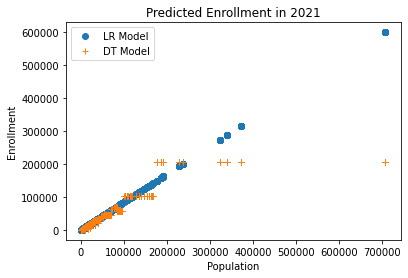

In [43]:
plt.plot(df_new1['POPESTIMATE2021'],df_new1['LR'], linestyle='',marker='o', label='LR Model')
plt.plot(df_new1['POPESTIMATE2021'],df_new1['DT'], linestyle='',marker='+', label='DT Model')
plt.xlabel('Population')
plt.ylabel('Enrollment')
plt.title('Predicted Enrollment in 2021')
plt.ticklabel_format(style='plain')
plt.legend().figure.savefig('Predicted_Enrollment_2021.png')

In [44]:
print('DT mean: ', df_new1['DT'].mean())
print('LR mean: ', df_new1['LR'].mean())

DT mean:  50456.331831831834
LR mean:  64604.514014014014


## Classification

In [45]:
df_FS = df.copy()

### Binning for repsonse variable

In [46]:
bins = np.linspace(min(df_FS['TOT_ENROLL']), max(df_FS['TOT_ENROLL']), 4)

In [47]:
group_names = ['Low', 'Medium', 'High']

In [48]:
df_FS['BINNED_TOT_ENROLL'] = pd.cut(df_FS['TOT_ENROLL'], bins, labels=group_names, include_lowest=True )
df_FS.head()

,FID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,TELEPHONE,TYPE,STATUS,...,STFIPS,COFIPS,SECTOR,LEVEL_,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,BINNED_TOT_ENROLL
0,7001,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,(501) 374-6305 ext 107,2,R,...,5,119,5,2,1,24,28,52,18,Low
1,7002,112181,Citrus Heights Beauty College,7518 Baird Way,Citris Heights,CA,95610,(916) 725-6861 ext 1,3,R,...,6,67,9,3,1,6,24,30,9,Low
2,7003,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,Los Angeles,CA,90027,(323) 467-4949,3,R,...,6,37,9,3,1,0,24,24,11,Low
3,7004,125310,Waynes College of Beauty,1271 North Main Street,Salinas,CA,93906,(831) 443-4077,3,R,...,6,53,9,3,1,18,16,34,9,Low
4,7005,164368,Hult International Business School,1 Education Street,Cambridge,MA,02141,(617) 746-1990,2,R,...,25,17,2,1,2,0,2243,2243,143,Low


In [49]:
df_FS.drop(columns=['TOT_ENROLL'], inplace=True)

### Label Encoding 

In [50]:
d = defaultdict(LabelEncoder)

df_FS = df_FS.apply(lambda x: d[x.name].fit_transform(x))
df_FS

,FID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,TELEPHONE,TYPE,STATUS,...,SOURCE,STFIPS,COFIPS,SECTOR,LEVEL_,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_EMPLOY,BINNED_TOT_ENROLL
0,7000,200,5846,5743,1478,2,3459,2559,2,5,...,200,3,71,5,2,2,24,28,18,1
1,7001,302,1326,6402,410,5,4638,6785,3,5,...,302,4,41,9,3,2,6,24,9,1
2,7002,395,3300,1874,1250,5,4231,1581,3,5,...,395,4,25,9,3,2,0,24,11,1
3,7003,606,7324,1083,1941,5,4520,6068,3,5,...,606,4,34,9,3,2,18,16,9,1
4,7004,1747,2899,28,313,22,151,3915,2,5,...,1747,21,12,2,1,3,0,1587,143,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,2995,6005,1574,756,890,7,316,6438,3,0,...,6005,6,8,9,3,2,119,19,25,1
7731,2996,6006,5073,908,707,57,1241,1087,1,0,...,6006,48,31,4,2,3,641,1651,282,1
7732,2997,6007,6721,6258,464,5,4255,1575,3,1,...,6007,4,25,9,3,2,0,0,0,1
7733,2998,6008,2947,484,602,12,1489,4252,3,0,...,6008,10,72,3,1,2,225,436,84,1


In [51]:
y = df_FS.BINNED_TOT_ENROLL
X = df_FS.drop("BINNED_TOT_ENROLL", 1)
colnames = X.columns

### Feature Selection using Boruta

In [52]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [53]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5)

feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)

In [54]:
feat_selector.fit(X.values, y.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=69, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x2E3210FA840),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2E3210FA840)

In [55]:
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [56]:
print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
boruta_score.tail(10)

---------Top 10----------


,Features,Score
26,TOT_EMPLOY,1.00
25,FT_ENROLL,1.00
24,PT_ENROLL,1.00
23,INST_SIZE,1.00
10,POPULATION,1.00
2,NAME,0.95
19,STFIPS,0.90
12,COUNTYFIPS,0.86
7,TELEPHONE,0.81
5,STATE,0.76


---------Bottom 10----------


,Features,Score
4,CITY,0.38
11,COUNTY,0.33
17,NAICS_DESC,0.29
21,SECTOR,0.29
14,LATITUDE,0.19
6,ZIP,0.14
16,NAICS_CODE,0.10
22,LEVEL_,0.05
9,STATUS,0.00
13,COUNTRY,0.00


Text(0.5, 1.0, 'Boruta Top 10 Features')

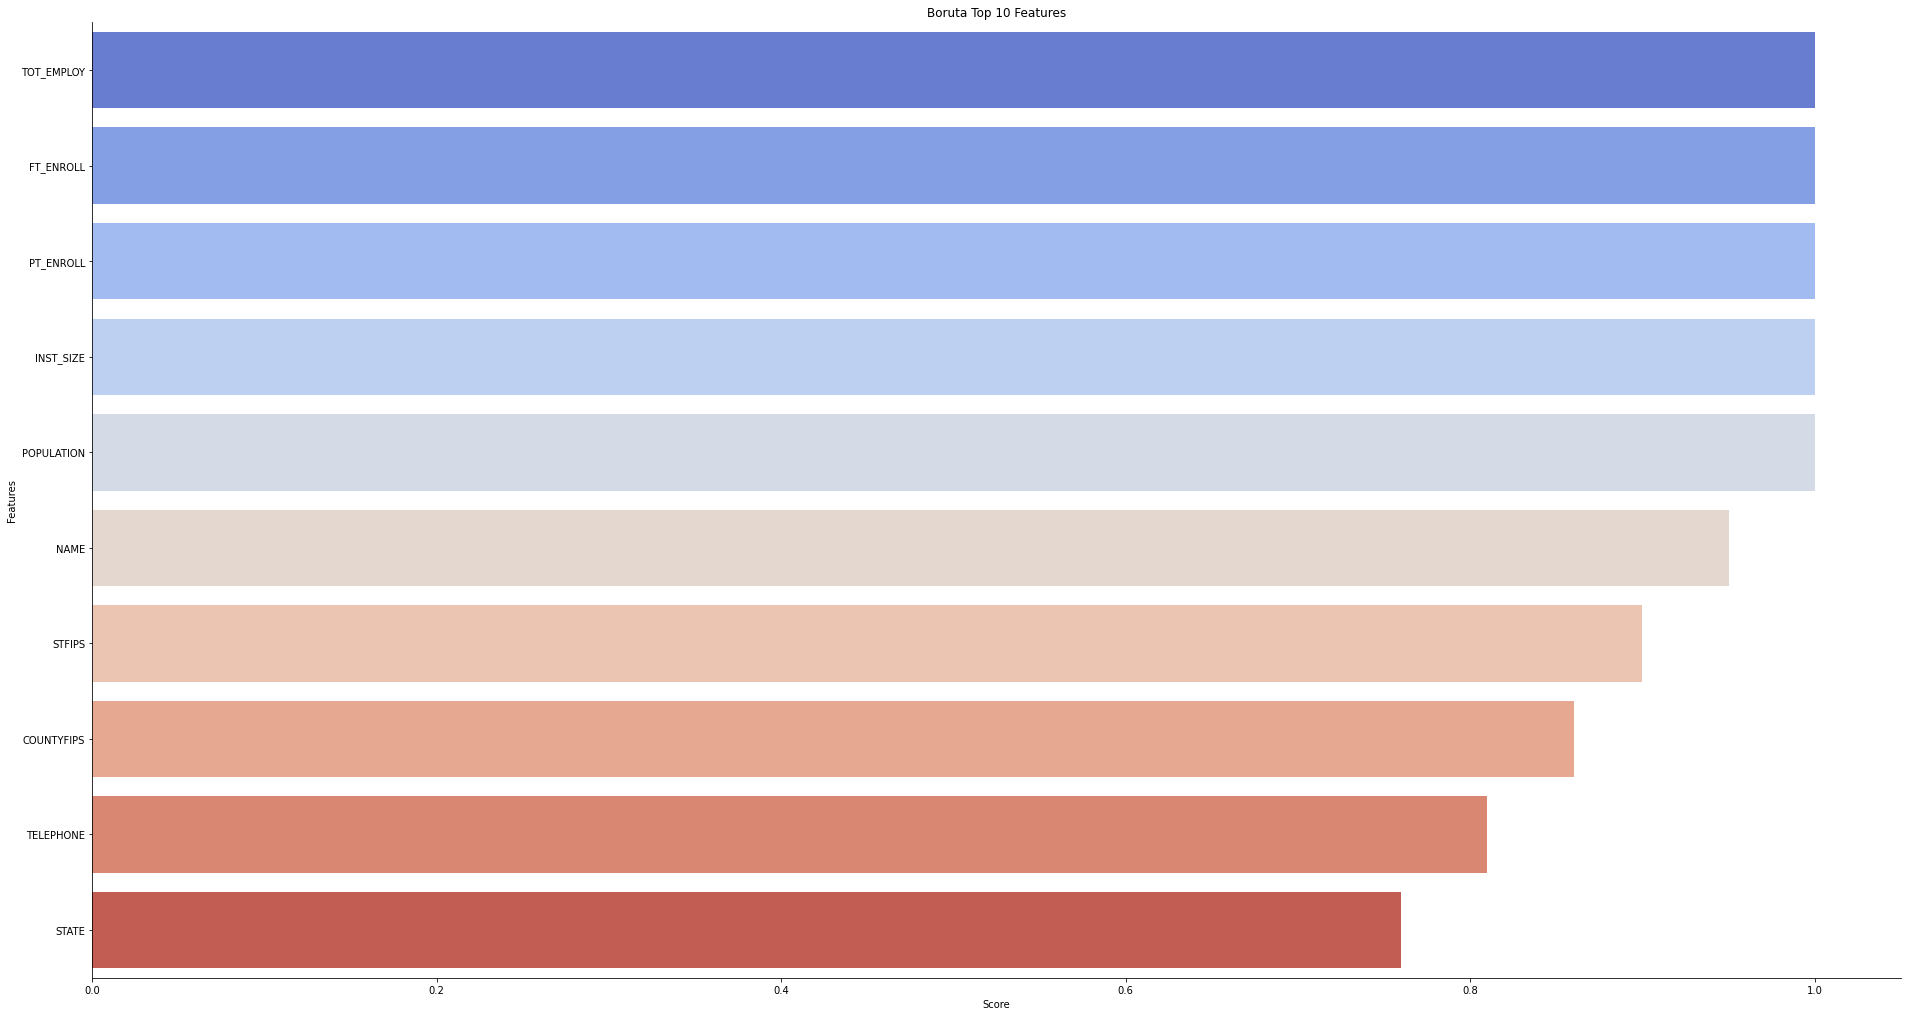

In [57]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:10], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top 10 Features")

In [58]:
top_10_features = boruta_score.Features[:10].tolist()

In [59]:
df_FS['BINNED_TOT_ENROLL'].value_counts()

1    7730
2       4
0       1
Name: BINNED_TOT_ENROLL, dtype: int64

### Balance dataset using resample

In [60]:
#create two different dataframe of majority and minority class 
df_majority = df_FS[(df_FS['BINNED_TOT_ENROLL']==1)] 
df_minority = df_FS[(df_FS['BINNED_TOT_ENROLL']==0)]
df_minority1 = df_FS[(df_FS['BINNED_TOT_ENROLL']==2)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 7730, # to match majority class
                                 random_state=42)  # reproducible results
df_minority_upsampled1 = resample(df_minority1, 
                                 replace=True,    # sample with replacement
                                 n_samples= 7730, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_FS = pd.concat([df_minority_upsampled, df_majority])
df_FS = pd.concat([df_minority_upsampled1, df_FS])

In [61]:
y = df_FS.BINNED_TOT_ENROLL
X = df_FS[top_10_features]

### Split train-test dataset

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10) 

### Create Naive Bayes Classifier

In [63]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)
    
prob_NB = nb.predict_proba(X_test)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=nb.predict(X_test))
print(sk_report)

Accuracy on training set: 1.000
Accuracy on test set: 1.000
Mjority classifier Confusion Matrix
 [[1570    0    0]
 [   0 1557    1]
 [   0    0 1510]]
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000      1570
           1   1.000000  0.999358  0.999679      1558
           2   0.999338  1.000000  0.999669      1510

    accuracy                       0.999784      4638
   macro avg   0.999779  0.999786  0.999783      4638
weighted avg   0.999785  0.999784  0.999784      4638



Class 0 ROC AUC OvR: 1.0000
Class 1 ROC AUC OvR: 1.0000
Class 2 ROC AUC OvR: 1.0000
Average ROC AUC OvR: 1.0000


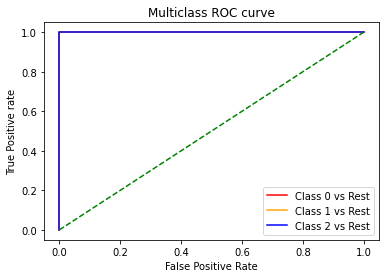

In [64]:
fpr = {}
tpr = {}
thresh ={}
n_class = df_FS['BINNED_TOT_ENROLL'].nunique()
classes = nb.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_NB[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = prob_NB[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

### Create Random Forest Classifier

In [65]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)
    
prob_RF = rf.predict_proba(X_test)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rf.predict(X_test))
print(sk_report)

Accuracy on training set: 1.000
Accuracy on test set: 1.000
Mjority classifier Confusion Matrix
 [[1570    0    0]
 [   0 1558    0]
 [   0    0 1510]]
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000      1570
           1   1.000000  1.000000  1.000000      1558
           2   1.000000  1.000000  1.000000      1510

    accuracy                       1.000000      4638
   macro avg   1.000000  1.000000  1.000000      4638
weighted avg   1.000000  1.000000  1.000000      4638



Class 0 ROC AUC OvR: 1.0000
Class 1 ROC AUC OvR: 1.0000
Class 2 ROC AUC OvR: 1.0000
Average ROC AUC OvR: 1.0000


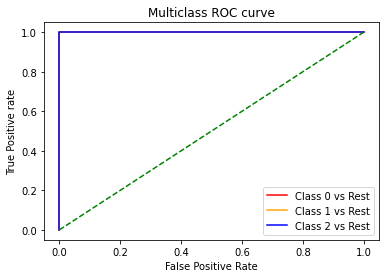

In [66]:
fpr = {}
tpr = {}
thresh ={}
n_class = df_FS['BINNED_TOT_ENROLL'].nunique()
classes = rf.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_RF[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = prob_RF[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")

# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

### Create K-Nearest Neighbors Classifier

In [67]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(KNN.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(KNN.score(X_test, y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_KNN = KNN.predict_proba(X_test)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=KNN.predict(X_test))
print(sk_report)

Accuracy on training set: 1.000
Accuracy on test set: 1.000
Mjority classifier Confusion Matrix
 [[1570    0    0]
 [   0 1557    1]
 [   0    0 1510]]
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000      1570
           1   1.000000  0.999358  0.999679      1558
           2   0.999338  1.000000  0.999669      1510

    accuracy                       0.999784      4638
   macro avg   0.999779  0.999786  0.999783      4638
weighted avg   0.999785  0.999784  0.999784      4638



Class 0 ROC AUC OvR: 1.0000
Class 1 ROC AUC OvR: 1.0000
Class 2 ROC AUC OvR: 1.0000
Average ROC AUC OvR: 1.0000


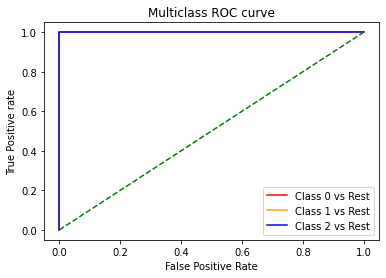

In [68]:
fpr = {}
tpr = {}
thresh ={}
n_class = df_FS['BINNED_TOT_ENROLL'].nunique()
classes = KNN.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_KNN[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = prob_KNN[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

### Classification models prediction

In [69]:
newData = pd.DataFrame({
    'TOT_EMPLOY':[83],
    'FT_ENROLL':[263],
    'PT_ENROLL':[219],
    'INST_SIZE':[2],
    'POPULATION':[557],
    'NAME':[2964],
    'STFIPS':[35],
    'COUNTYFIPS':[960],
    'TELEPHONE':[3783],
    'STATE':[40]
})

newData

,TOT_EMPLOY,FT_ENROLL,PT_ENROLL,INST_SIZE,POPULATION,NAME,STFIPS,COUNTYFIPS,TELEPHONE,STATE
0,83,263,219,2,557,2964,35,960,3783,40


In [70]:
d['BINNED_TOT_ENROLL'].inverse_transform(nb.predict(newData))

array(['Low'], dtype=object)

### 3.5 Causal Question

In [71]:
df2 = df.copy()
filter = df2['INST_SIZE'] > 0
df2 = df2[filter]
df2.head()

,FID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,TELEPHONE,TYPE,STATUS,...,STFIPS,COFIPS,SECTOR,LEVEL_,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,BINNED_TOT_ENROLL
0,7001,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,(501) 374-6305 ext 107,2,R,...,5,119,5,2,1,24,28,52,18,Low
1,7002,112181,Citrus Heights Beauty College,7518 Baird Way,Citris Heights,CA,95610,(916) 725-6861 ext 1,3,R,...,6,67,9,3,1,6,24,30,9,Low
2,7003,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,Los Angeles,CA,90027,(323) 467-4949,3,R,...,6,37,9,3,1,0,24,24,11,Low
3,7004,125310,Waynes College of Beauty,1271 North Main Street,Salinas,CA,93906,(831) 443-4077,3,R,...,6,53,9,3,1,18,16,34,9,Low
4,7005,164368,Hult International Business School,1 Education Street,Cambridge,MA,02141,(617) 746-1990,2,R,...,25,17,2,1,2,0,2243,2243,143,Low


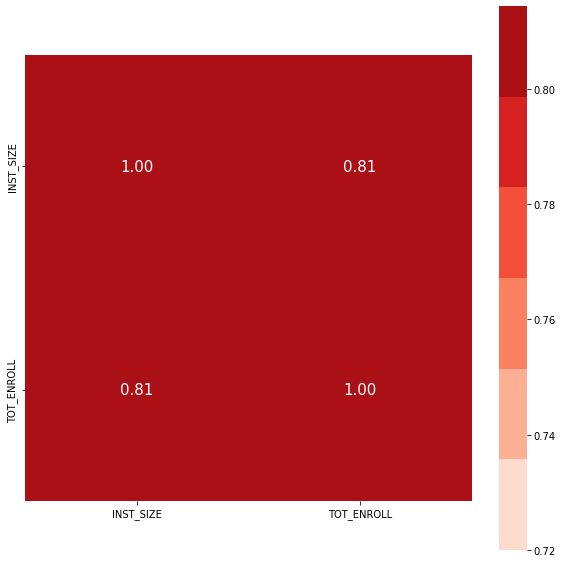

In [72]:
corr_list = list(['INST_SIZE', 'TOT_ENROLL'])
corr = df2[corr_list].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds")).figure.savefig('Heatmap3.png')

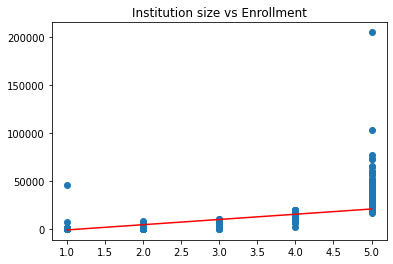

In [73]:
plt.scatter(df2['INST_SIZE'],df2['TOT_ENROLL'])
plt.plot(np.unique(df2['INST_SIZE']), np.poly1d(np.polyfit(df2['INST_SIZE'], df2['TOT_ENROLL'], 1))
         (np.unique(df2['INST_SIZE'])), color='red')
plt.title('Institution size vs Enrollment').figure.savefig('Inst_vs_Enrollment_Regplot.png')